# Dogs vs Cats Classification

This Dataset is taken from kaggle : https://www.kaggle.com/c/dogs-vs-cats/data

Since the above data is very much huge!! you can get a small subset like 1000 images from here :https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [1]:
# importing the libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# In a good practice lets define all the base directories that we will be requiring later on.

base_dir = '../dogs-vs-cats/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#Training Data
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

#Test Data
test_cats_dir = os.path.join(validation_dir,'cats')
test_dogs_dir = os.path.join(validation_dir,'dogs')


In [9]:
train_cats_dir

'../dogs-vs-cats/cats_and_dogs_filtered\\train\\cats'

In [11]:
print('\n\n TRAIN DATA')
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10],train_dog_fnames[:10])


print('\n\n TEST DATA')
test_cat_fnames = os.listdir( test_cats_dir )
test_dog_fnames = os.listdir( test_dogs_dir )
print(test_cat_fnames[:10],test_dog_fnames[:10])



 TRAIN DATA
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg'] ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


 TEST DATA
['cat.2000.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2003.jpg', 'cat.2004.jpg', 'cat.2005.jpg', 'cat.2006.jpg', 'cat.2007.jpg', 'cat.2008.jpg', 'cat.2009.jpg'] ['dog.2000.jpg', 'dog.2001.jpg', 'dog.2002.jpg', 'dog.2003.jpg', 'dog.2004.jpg', 'dog.2005.jpg', 'dog.2006.jpg', 'dog.2007.jpg', 'dog.2008.jpg', 'dog.2009.jpg']


In [45]:
# Total number of cats and dogs images in training data 
print('No. of Cats in Training : ',len(train_cat_fnames))
print('No. of Dogs in Training : ',len(train_dog_fnames))

# Total number of cats and dogs images in test data 
print('No. of Cats in Training : ',len(test_cat_fnames))
print('No. of Dogs in Training : ',len(test_dog_fnames))

# so we have balanced dataset :)

No. of Cats in Training :  1000
No. of Dogs in Training :  1000
No. of Cats in Training :  500
No. of Dogs in Training :  500


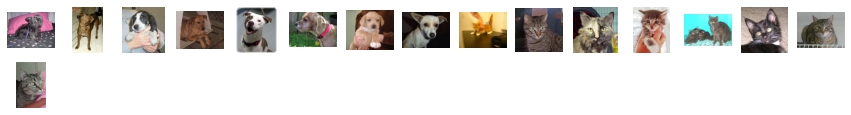

In [116]:
#plotting the data

import matplotlib.image as mpimg

nrows = 15
ncols = 15

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(nrows,ncols)
pic_index+=8

next_dog_pic = [os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

next_cat_pic = [os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dog_pic+next_cat_pic):
    
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('Off') # Dont show axis or gridlines
    
    img = mpimg.imread(img_path) # Read an image from a file into an Array.
    #print(img)
    plt.imshow(img)
    
plt.show()



In [63]:
# Building the Model Architecture...

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [65]:
# Compiling the Model

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])


In [67]:
# ImageGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0) # Normalizing(Bringing down to a similar scale) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalizing(Bringing down to a similar scale)


#------------------------------------------------------------------------
# Flow Training images in batches of 20 using the train_datagen generator
#-------------------------------------------------------------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

#------------------------------------------------------------------------
# Flow Validation images in batches of 20 using the train_datagen generator
#-------------------------------------------------------------------------
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [73]:
# Fitting the model
history = model.fit(train_generator,
                    validation_data=test_generator,
                   epochs=15,
                   steps_per_epoch=100,
                   validation_steps=50,
                   verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - 11s 106ms/step - loss: 0.2411 - accuracy: 0.8975 - val_loss: 0.7242 - val_accuracy: 0.7290
Epoch 2/15
100/100 [==============================] - 10s 104ms/step - loss: 0.1796 - accuracy: 0.9320 - val_loss: 1.0796 - val_accuracy: 0.7060
Epoch 3/15
100/100 [==============================] - 10s 102ms/step - loss: 0.1284 - accuracy: 0.9540 - val_loss: 1.1517 - val_accuracy: 0.7080
Epoch 4/15
100/100 [==============================] - 10s 103ms/step - loss: 0.1076 - accuracy: 0.9610 - val_loss: 1.1639 - val_accuracy: 0.7220
Epoch 5/15
100/100 [==============================] - 9s 92ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 1.3817 - val_accuracy: 0.7120
Epoch 6/15
100/100 [==============================] - 8s 81ms/step - loss: 0.0658 - accuracy: 0.9830 - val_loss: 1.4628 - val_accuracy: 0.7410
Epoch 7/15
100/100 [=====================

# Plotting the accuracy and loss

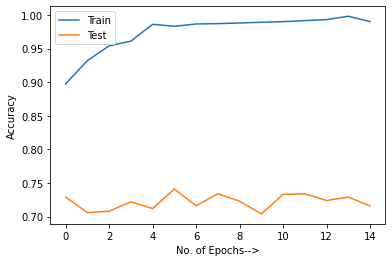

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.xlabel('No. of Epochs-->')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')

ValueError: x and y must have same first dimension, but have shapes (100,) and (15,)

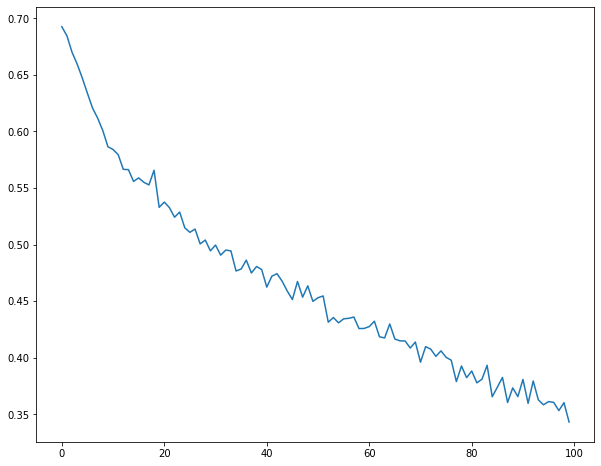

In [117]:
plt.figure(figsize=(10,8))
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.xlabel('No. of Epochs-->')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='best')

We can clearly see that our data is overfitting!!

# Data Augmentation

In [ ]:
# training for 100 epochs and adding an extra conv layer  

In [96]:
# Again Creating the model Architecture by adding a Convolution layer and also doing Data Augmentation.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])


model.summary() # summarizing the model Architecture!

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [97]:
# Compiling the model with optimizers and loss and metrics

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
# ImageGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255.0) # Validation data should not be augmented!!!


#------------------------------------------------------------------------
# Flow Training images in batches of 20 using the train_datagen generator
#-------------------------------------------------------------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

#------------------------------------------------------------------------
# Flow Validation images in batches of 20 using the train_datagen generator
#-------------------------------------------------------------------------
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [99]:
history = model.fit(train_generator,
                   steps_per_epoch=100,  # 2000 images = batch_size * steps
                   epochs=100,
                   validation_data = test_generator,
                   validation_steps=50,  # 1000 images = batch_size * steps
                   verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6926 - accuracy: 0.5320 - val_loss: 0.6761 - val_accuracy: 0.6000
Epoch 2/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6844 - accuracy: 0.5485 - val_loss: 0.6794 - val_accuracy: 0.5200
Epoch 3/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6699 - accuracy: 0.5945 - val_loss: 0.6619 - val_accuracy: 0.5770
Epoch 4/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6595 - accuracy: 0.6090 - val_loss: 0.6655 - val_accuracy: 0.5630
Epoch 5/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6472 - accuracy: 0.6260 - val_loss: 0.6132 - val_accuracy: 0.6460
Epoch 6/100
100/100 [==============================] - 11s 107ms/step - loss: 0.6336 - accuracy: 0.6390 - val_loss: 0.5926 - val_accuracy: 0.6730
Epoch 7/100
100/100 [==========

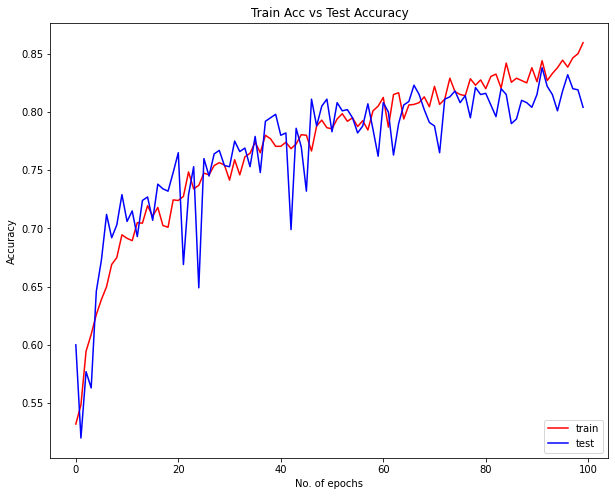

In [107]:
acc = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,8))
plt.plot(epochs,acc,'r')
plt.plot(epochs,validation_accuracy,'b')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='lower right')
plt.title('Train Acc vs Test Accuracy')
plt.show()

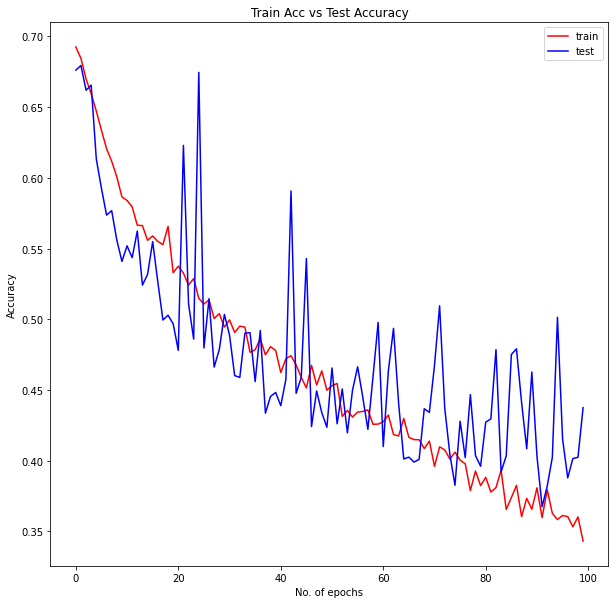

In [110]:
plt.figure(figsize=(10,10))
plt.plot(epochs,loss,'r')
plt.plot(epochs,validation_loss,'b')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='best')
plt.title('Train Acc vs Test Accuracy')
plt.show()